<a href="https://colab.research.google.com/github/Amanblackdevil/Machine-Learning/blob/main/Decision_Tree_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
X = df.drop(['target'], axis=1)
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [6]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier

entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [30]:
entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [31]:
y_pred_entropy = entropy.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_entropy)

0.7012987012987013

In [33]:
y_pred_train = entropy.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.7726638772663877

In [34]:
entropy.score(X_test, y_test)

0.7012987012987013

[Text(0.5, 0.8333333333333334, 'x[8] <= 0.5\nentropy = 0.999\nsamples = 308\nvalue = [159, 149]'),
 Text(0.25, 0.5, 'x[11] <= 0.5\nentropy = 0.915\nsamples = 203\nvalue = [67, 136]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.673\nsamples = 130\nvalue = [23, 107]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.969\nsamples = 73\nvalue = [44, 29]'),
 Text(0.75, 0.5, 'x[9] <= 1.55\nentropy = 0.54\nsamples = 105\nvalue = [92, 13]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.811\nsamples = 48\nvalue = [36, 12]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.127\nsamples = 57\nvalue = [56, 1]')]

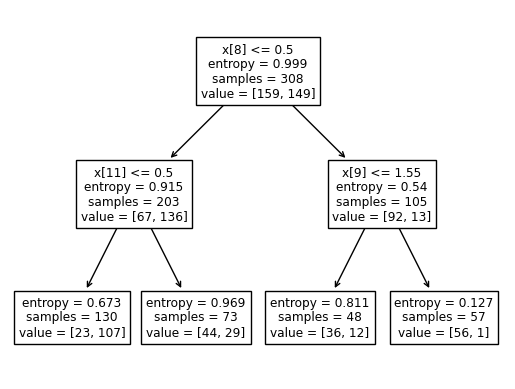

In [35]:
from sklearn import tree
tree.plot_tree(entropy.fit(X_test, y_test))